# Chicago Food Inspection Analysis

This is the main Jupiter notebook, where we will perform the analysis. Let's start with loading the dataset and getting the initial 
information about it.

In [1]:
import pandas as pd
from collections import Counter
from geopy.distance import geodesic
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = 'Food_Inspections.csv'  
data = pd.read_csv(file_path)

# Display the first few rows to get an overview
print("Dataset Preview:")
display(data.head())

# Display basic information about the dataset
print("\nDataset Information:")
data.info()

# Display summary statistics for numeric columns
print("\nSummary Statistics:")
display(data.describe())

# Check for missing values in each column
print("\nMissing Values:")
missing_values = data.isnull().sum()
display(missing_values)

# Check the unique values in key categorical columns
categorical_columns = ['Results', 'Risk', 'Facility Type', 'Inspection Type']
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    display(data[col].unique())

# Check the data types of all columns
print("\nColumn Data Types:")
display(data.dtypes)

Dataset Preview:


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2606078,LOOMIS CITGO INC.,LOOMIS CITGO INC.,2523672.0,GAS STATION,Risk 2 (Medium),1356 W 87TH ST,CHICAGO,IL,60620.0,11/07/2024,Canvass Re-Inspection,Pass,49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...,41.735973,-87.658068,"(41.73597328807627, -87.65806837861354)"
1,2606036,SALUD Y ARMONIA,SALUD Y ARMONIA,2482856.0,HERBALIFE,Risk 2 (Medium),6348 S PULASKI RD,CHICAGO,IL,60629.0,11/06/2024,Canvass,Out of Business,NaN,41.777161,-87.722870,"(41.777160612785934, -87.72287035404236)"
2,2606023,WALDO COONEY'S PIZZA,WALDO COONEY'S PIZZA,2996989.0,Restaurant,Risk 1 (High),2640 W 51ST ST,CHICAGO,IL,60632.0,11/06/2024,License,Pass,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,41.801154,-87.690741,"(41.80115359848577, -87.6907407136006)"
3,2606007,LA CATEDRAL CAFE ON OGDEN INC.,LA CATEDRAL CAFE,2934865.0,Restaurant,Risk 1 (High),1407 S WASHTENAW AVE,CHICAGO,IL,60608.0,11/06/2024,Canvass Re-Inspection,Pass,NaN,41.862528,-87.693150,"(41.862528351766, -87.69314955564016)"
4,2605988,Cafe Latin Bliss,Cafe Latin Bliss,8404.0,Restaurant,Risk 1 (High),5515 N LINCOLN AVE,CHICAGO,IL,60625.0,11/06/2024,Canvass Re-Inspection,Pass,NaN,41.981866,-87.692834,"(41.98186603682908, -87.69283405676238)"



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281556 entries, 0 to 281555
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    281556 non-null  int64  
 1   DBA Name         281556 non-null  object 
 2   AKA Name         279123 non-null  object 
 3   License #        281538 non-null  float64
 4   Facility Type    276387 non-null  object 
 5   Risk             281474 non-null  object 
 6   Address          281556 non-null  object 
 7   City             281401 non-null  object 
 8   State            281493 non-null  object 
 9   Zip              281515 non-null  float64
 10  Inspection Date  281556 non-null  object 
 11  Inspection Type  281555 non-null  object 
 12  Results          281556 non-null  object 
 13  Violations       203795 non-null  object 
 14  Latitude         280578 non-null  float64
 15  Longitude        280578 non-null  float64
 16  Location        

,Inspection ID,License #,Zip,Latitude,Longitude
count,2.815560e+05,2.815380e+05,281515.000000,280578.000000,280578.000000
mean,1.772912e+06,1.746482e+06,60628.629416,41.880689,-87.676239
std,7.262182e+05,9.331496e+05,156.973173,0.081017,0.058304
min,4.424700e+04,0.000000e+00,10014.000000,41.644670,-87.906874
25%,1.324984e+06,1.357345e+06,60614.000000,41.831819,-87.707328
50%,1.975426e+06,2.065037e+06,60625.000000,41.891773,-87.666234
75%,2.401502e+06,2.398197e+06,60643.000000,41.939765,-87.634861
max,2.606078e+06,9.999999e+06,90504.000000,42.021064,-87.525094



Missing Values:


Inspection ID          0
DBA Name               0
AKA Name            2433
License #             18
Facility Type       5169
Risk                  82
Address                0
City                 155
State                 63
Zip                   41
Inspection Date        0
Inspection Type        1
Results                0
Violations         77761
Latitude             978
Longitude            978
Location             978
dtype: int64


Unique values in 'Results':


array(['Pass', 'Out of Business', 'Not Ready', 'Pass w/ Conditions',
       'No Entry', 'Fail', 'Business Not Located'], dtype=object)


Unique values in 'Risk':


array(['Risk 2 (Medium)', 'Risk 1 (High)', 'Risk 3 (Low)', 'All', nan],
      dtype=object)


Unique values in 'Facility Type':


array(['GAS STATION', 'HERBALIFE', 'Restaurant',
       'Daycare Above and Under 2 Years', 'Grocery Store', nan, 'Banquet',
       'Mobile Food Dispenser', '(REHAB CENTER)', 'Special Event',
       'Daycare (2 - 6 Years)', 'AFTER SCHOOL PROGRAM', 'BANQUET',
       "Children's Services Facility", 'Golden Diner', 'Hospital',
       'BANQUET HALL', 'Long Term Care', 'Daycare (Under 2 Years)',
       'School', 'ADULT DAYCARE', 'FREE FOOD PANTRY', 'Liquor',
       'Catering', 'Bakery', 'LIVE POULTRY SLAUGHTER FACILITY',
       'LIVE POULTRY SLAUGHTER', 'Wholesale',
       'Mobile Prepared Food Vendor', 'CHURCH (FOOD PANTRY)',
       'CHILDRENS SERVICES FACILITY', 'HOTEL', 'TAVERN', 'EVENT CENTER',
       'Shared Kitchen User (Short Term)', 'Mobile Food Preparer',
       'STORE', 'Shared Kitchen User (Long Term)', 'ROOFTOP',
       'MUSIC VENUE', 'Grocery(Sushi prep)',
       'Mobile Frozen Desserts Vendor',
       'Pop-Up Food Establishment User-Tier II', 'Shared Kitchen',
       'ROOF TOP'


Unique values in 'Inspection Type':


array(['Canvass Re-Inspection', 'Canvass', 'License',
       'License Re-Inspection', 'Non-Inspection',
       'Complaint Re-Inspection', 'Complaint', 'Short Form Complaint',
       'Recent Inspection', 'Suspected Food Poisoning Re-inspection',
       'Not Ready', 'Consultation', 'Suspected Food Poisoning',
       'OUT OF BUSINESS', 'COVID COMPLAINT', 'Special Events (Festivals)',
       'KITCHEN CLOSED FOR RENOVATION', 'Complaint-Fire Re-inspection',
       'O.B.', 'Short Form Fire-Complaint', 'Complaint-Fire',
       'OWNER SUSPENDED OPERATION/LICENSE', 'LICENSE CONSULTATION',
       'License consultation', 'Task Force Liquor 1475',
       'License-Task Force', 'Pre-License Consultation', 'NO ENTRY',
       'Package Liquor 1474', 'Tag Removal', 'FIRE/COMPLAIN',
       'Task Force for liquor 1474', 'ADDENDUM', 'no entry',
       'SFP/COMPLAINT', 'TASK FORCE NIGHT', 'SFP RECENTLY INSPECTED',
       'SFP', 'LICENSE RENEWAL FOR DAYCARE',
       'CANVASS RE INSPECTION OF CLOSE UP', 'LICEN


Column Data Types:


Inspection ID        int64
DBA Name            object
AKA Name            object
License #          float64
Facility Type       object
Risk                object
Address             object
City                object
State               object
Zip                float64
Inspection Date     object
Inspection Type     object
Results             object
Violations          object
Latitude           float64
Longitude          float64
Location            object
dtype: object

Good. I believe the results are self-explanatory, so I will not go deep into describing it. 

Let's move on to the topic of 
## High and Low Pass Rate Zip Codes

Top 5 Zip Codes with Highest Pass Rates:


Zip
10014    100.0
60173    100.0
60189    100.0
60202    100.0
60302    100.0
Name: Pass_Fail, dtype: float64


Top 5 Zip Codes with Lowest Pass Rates:


Zip
60482    20.0
46319     0.0
60091     0.0
60559     0.0
80439     0.0
Name: Pass_Fail, dtype: float64

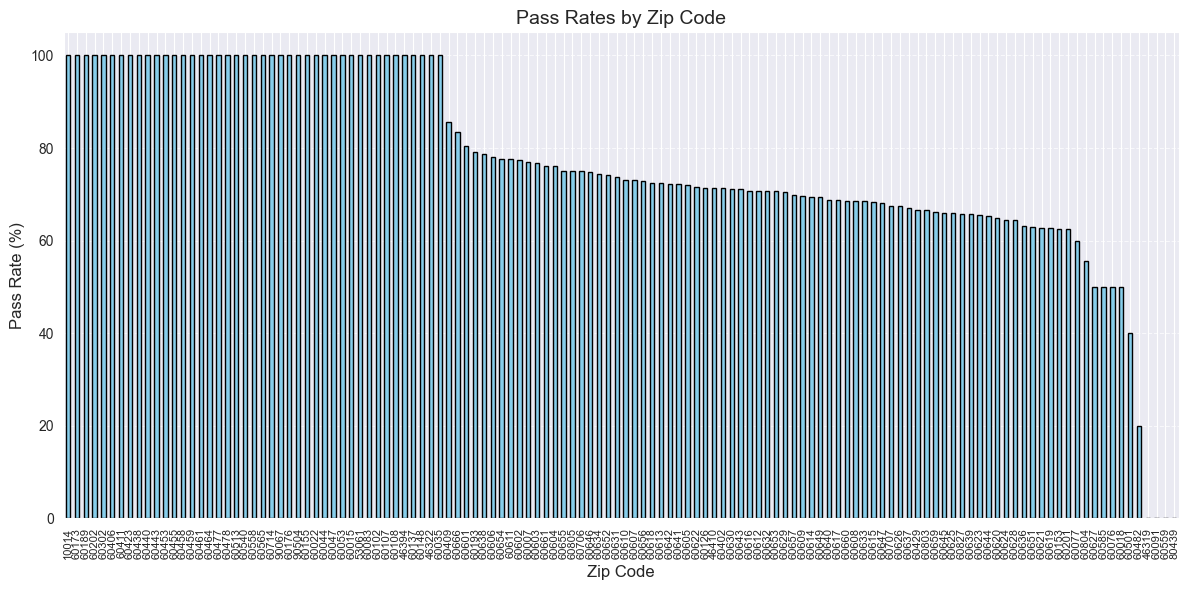

In [3]:
# Filter relevant columns
inspection_data = data[['Zip', 'Results']].copy()

# Drop rows with missing values in 'Zip' or 'Results'
inspection_data = inspection_data.dropna(subset=['Zip', 'Results'])

# Convert 'Zip' to integer for grouping
inspection_data['Zip'] = inspection_data['Zip'].astype(int)

# Define pass and fail categories
pass_categories = ['Pass', 'Pass w/ Conditions']
fail_categories = ['Fail', 'Out of Business']

# Create a pass/fail indicator column
inspection_data['Pass_Fail'] = inspection_data['Results'].apply(
    lambda x: 1 if x in pass_categories else 0 if x in fail_categories else None
)

# Drop rows with undefined Pass_Fail values
inspection_data = inspection_data.dropna(subset=['Pass_Fail'])

# Group by 'Zip' and calculate pass rate
zip_pass_rates = inspection_data.groupby('Zip')['Pass_Fail'].mean() * 100  # Convert to percentage

# Sort zip codes by pass rate
sorted_zip_rates = zip_pass_rates.sort_values(ascending=False)

# Display top and bottom 5 zip codes by pass rate
print("Top 5 Zip Codes with Highest Pass Rates:")
display(sorted_zip_rates.head(5))

print("\nTop 5 Zip Codes with Lowest Pass Rates:")
display(sorted_zip_rates.tail(5))

# Create a bar chart
sorted_zip_rates.plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black')
plt.title('Pass Rates by Zip Code', fontsize=14)
plt.xlabel('Zip Code', fontsize=12)
plt.ylabel('Pass Rate (%)', fontsize=12)
plt.xticks(rotation=90, fontsize=8)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

I think this provides a great understanding of the situation. Quite a lot of zipcodes have a 100% passing rate. Yet, the majority has a passing rate around 70%. 

Let's make a better visualization for someone who is not familiar with Chicago zipcodes:

Skipping field adjacent_zips: unsupported OGR type: 5
Skipping field adjacent_community_areas: unsupported OGR type: 5


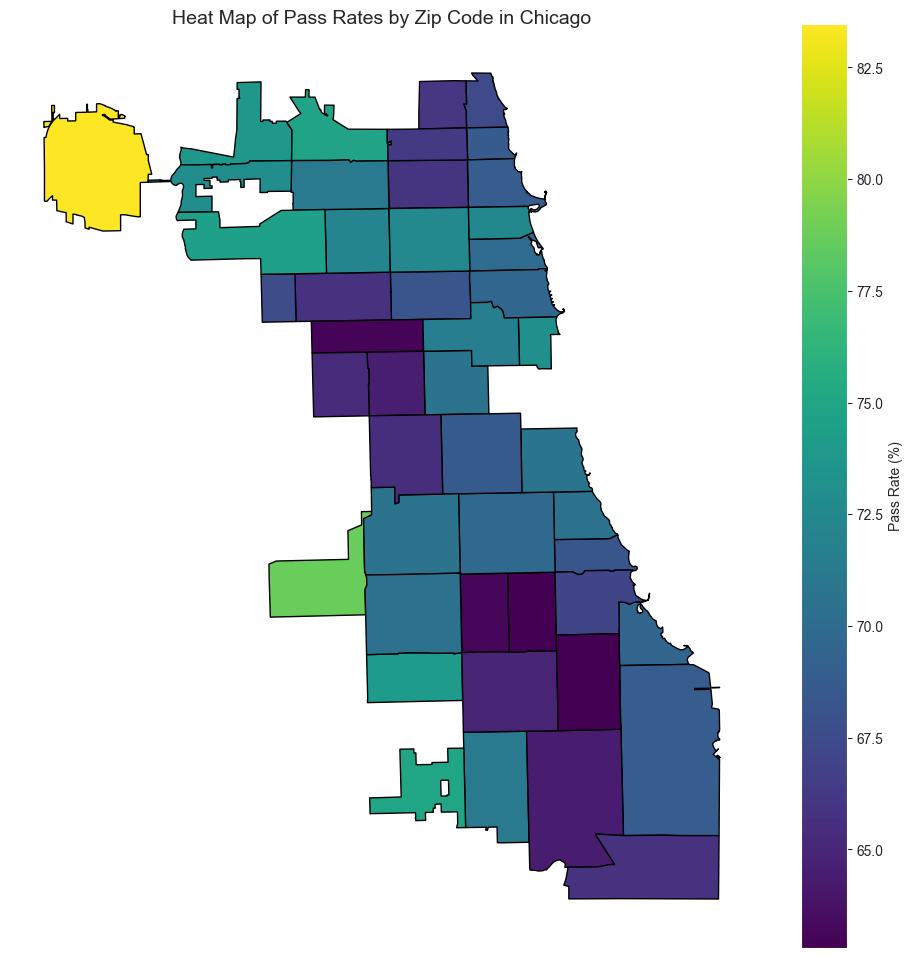

In [4]:
# Load the Chicago zip code GeoJSON file
geo_file = 'zipcodes.geojson'
geo_data = gpd.read_file(geo_file)

# Ensure the correct column name ('ZIP') is used
geo_data['ZIP'] = geo_data['ZIP'].astype(int)  # Convert ZIP column to integer for merging

# Merge pass rates with the geo data
merged_data = geo_data.merge(sorted_zip_rates, left_on='ZIP', right_index=True, how='left')

# Plot the heat map
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
merged_data.plot(
    column='Pass_Fail',  # Column with pass rates
    cmap='viridis',       # Color map
    legend=True,
    legend_kwds={'label': "Pass Rate (%)"},
    ax=ax,
    edgecolor='black'
)

# Add title and clean layout
ax.set_title('Heat Map of Pass Rates by Zip Code in Chicago', fontsize=14)
plt.axis('off')  
plt.show()

With this we can go to the next section,

## Pass Rate Changes Over Time

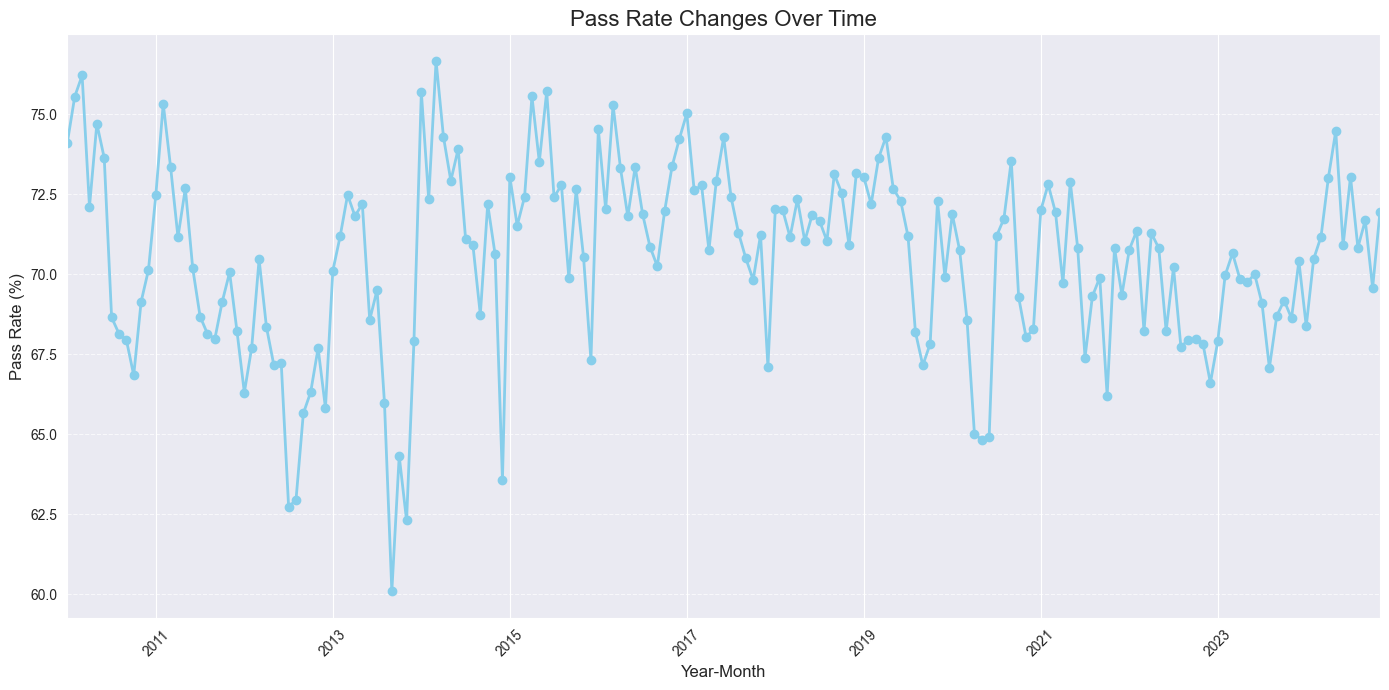

In [5]:
# Convert 'Inspection Date' to datetime format
data['Inspection Date'] = pd.to_datetime(data['Inspection Date'])

# Extract year and month from the 'Inspection Date'
data['Year-Month'] = data['Inspection Date'].dt.to_period('M')  # Format: YYYY-MM

# Filter relevant columns
time_data = data[['Year-Month', 'Results']].copy()

# Create a Pass_Fail column
time_data['Pass_Fail'] = time_data['Results'].apply(
    lambda x: 1 if x in pass_categories else 0 if x in fail_categories else None
)

# Drop rows with undefined Pass_Fail values
time_data = time_data.dropna(subset=['Pass_Fail'])

# Group by Year-Month and calculate pass rates
pass_rate_over_time = time_data.groupby('Year-Month')['Pass_Fail'].mean() * 100  # Convert to percentage

# Plot pass rate changes over time
plt.figure(figsize=(14, 7))
pass_rate_over_time.plot(kind='line', marker='o', color='skyblue', linewidth=2)
plt.title('Pass Rate Changes Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Pass Rate (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

I believe the graph shows no clear trend. We can see a weak trend in decline from around 2014 up until 2023, but no more than that. Statistical analysis
is required for further examination. 

## Trend in Number of Inspections

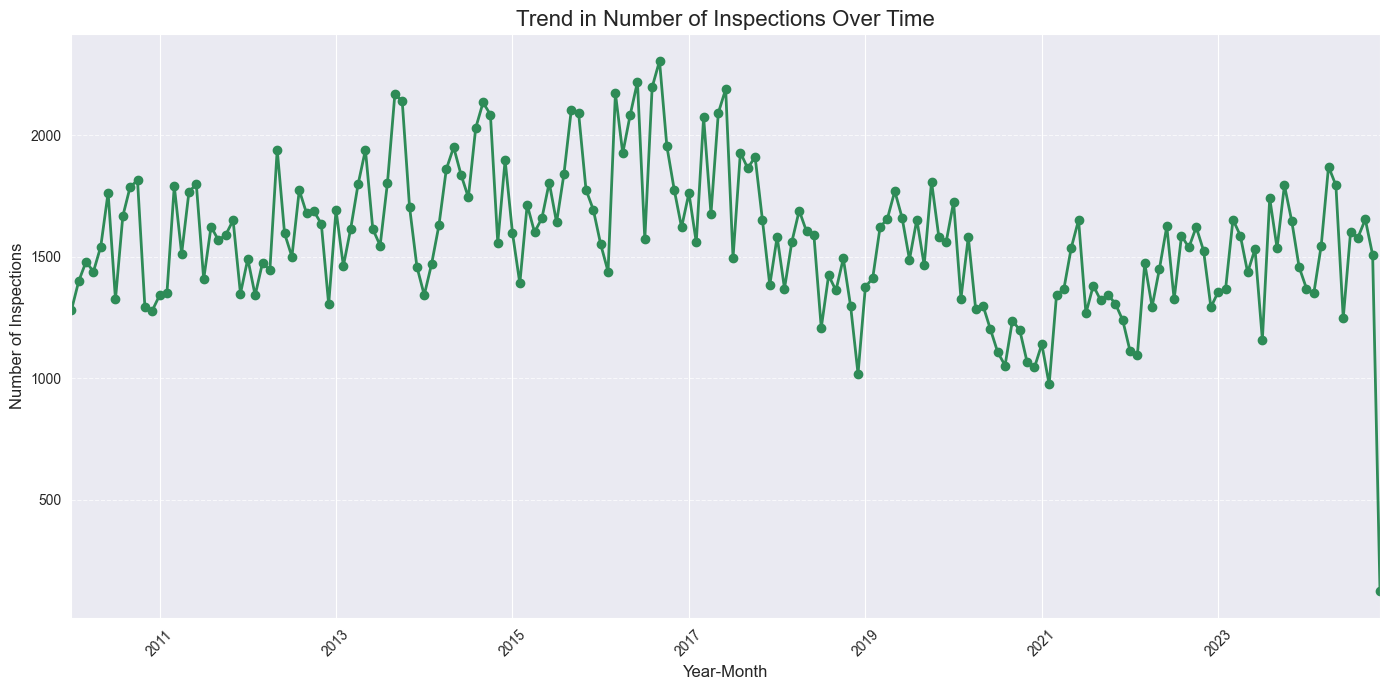

In [6]:
# Ensure 'Inspection Date' is in datetime format
data['Inspection Date'] = pd.to_datetime(data['Inspection Date'])

# Extract Year-Month for time grouping
data['Year-Month'] = data['Inspection Date'].dt.to_period('M')  # Format: YYYY-MM

# Group by Year-Month and count the number of inspections
inspection_trend = data.groupby('Year-Month')['Inspection ID'].count()

# Plot the trend of the number of inspections
plt.figure(figsize=(14, 7))
inspection_trend.plot(kind='line', marker='o', color='seagreen', linewidth=2)
plt.title('Trend in Number of Inspections Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Inspections', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)  
plt.tight_layout()
plt.show()

Fantastic! While this shows the aggregate data by months, we can aggregate it by zip codes too:

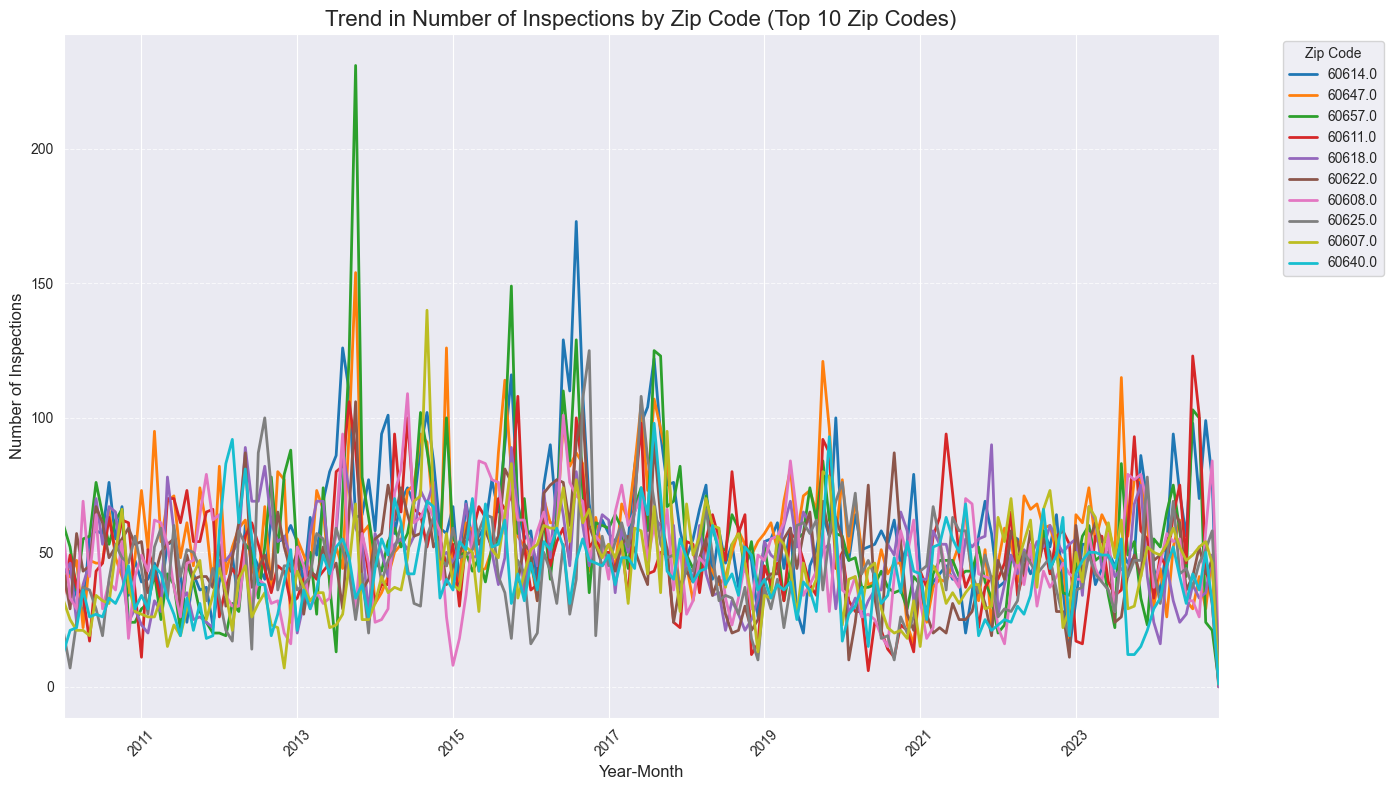

In [7]:
# Ensure 'Inspection Date' is in datetime format
data['Inspection Date'] = pd.to_datetime(data['Inspection Date'])

# Extract Year-Month for time grouping
data['Year-Month'] = data['Inspection Date'].dt.to_period('M')  # Format: YYYY-MM

# Group by Year-Month and Zip, count the number of inspections
inspections_by_zip = data.groupby(['Year-Month', 'Zip'])['Inspection ID'].count().unstack(fill_value=0)

# Plot trends for top 10 zip codes with the most inspections overall
top_zip_codes = inspections_by_zip.sum().sort_values(ascending=False).head(10).index  # Top 10 zip codes
filtered_inspections = inspections_by_zip[top_zip_codes]

# Create a multi-line plot
plt.figure(figsize=(14, 8))
filtered_inspections.plot(ax=plt.gca(), linewidth=2)
plt.title('Trend in Number of Inspections by Zip Code (Top 10 Zip Codes)', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Inspections', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.legend(title='Zip Code', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This graph shows only ten zip codes, and there is a lot of variability. I do not think we can single out any particular zipcode for having
too many or to few inspections. Again, in case more analysis is required, I would suggest performing statistical analysis,
what is outside the scope of this project.

## Common Reasons for Violations

Because the violation descriptions are very large, it would not look nice on a graph. That's how we will only show the code of the 
violation. The glossary table is attached.

                                           Violation  Count Code
0  37. food properly labeled; original container ...    545   37
1  58. allergen training as required - comments: ...    443   58
2  5. procedures for responding to vomiting and d...    371    5
3  42. appropriate method of handling of food (ic...    306   42
4  43. food (ice) dispensing utensils, wash cloth...    306   43
5  3. management, food employee and conditional e...    297    3
6  57. all food employees have food handler train...    274   57
7  41. premises maintained free of litter, unnece...    270   41
8  55. physical facilities installed, maintained ...    268   55
9  3. management, food employee and conditional e...    245    3


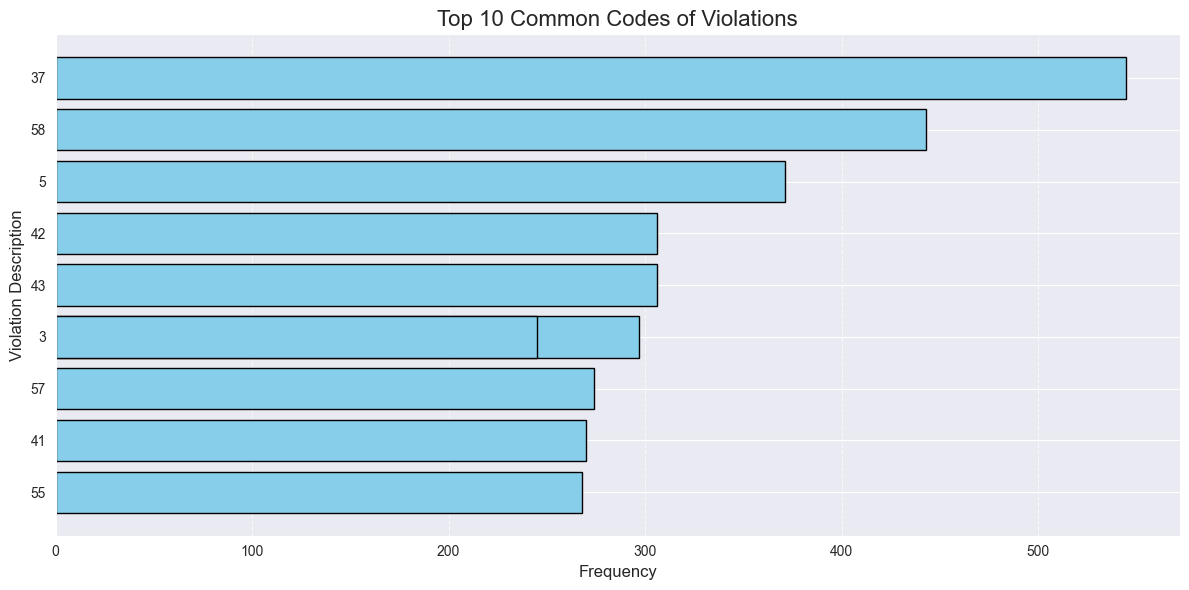

In [8]:
# Filter rows with non-empty violations
violation_data = data['Violations'].dropna()

# Split violation descriptions into individual reasons
all_violations = []
for row in violation_data:
    # Each violation is separated by '|', split them and extend to the list
    all_violations.extend(row.split('|'))

# Clean and standardize the text (remove whitespace and convert to lowercase)
all_violations = [violation.strip().lower() for violation in all_violations]

# Count the frequency of each violation
violation_counts = Counter(all_violations)

# Get the top 10 most common violations
common_violations = violation_counts.most_common(10)

# Convert to a DataFrame for easier visualization
common_violations_df = pd.DataFrame(common_violations, columns=['Violation', 'Count'])

common_violations_df['Code'] = common_violations_df['Violation'].apply(lambda x: x.split('.')[0] if '.' in x else None)

print(common_violations_df.head(10))

# Bar Chart of Common Violations
plt.figure(figsize=(12, 6))
plt.barh(common_violations_df['Code'], common_violations_df['Count'], color='skyblue', edgecolor='black')
plt.title('Top 10 Common Codes of Violations', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Violation Description', fontsize=12)
plt.gca().invert_yaxis()  # Reverse the order to show the most common on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This shows the most common violations have codes 37, 58, 5, 42, 43, etc. They are corresponding to:
- food properly labeled;
- allergen training as required;
- procedures for responding to vomiting, etc.

## Repeated Violations at Locations

   License #  Violation Count                           DBA Name  \
0    14616.0              109        ILLINOIS SPORTSERVICE, INC.   
1  1354323.0               58         SPORTSERVICE SOLDIER FIELD   
2    60184.0               57               TAQUERIA EL RANCHITO   
3  1596210.0               54           Food 4 Less Midwest #552   
4  1142451.0               53           JEWEL FOOD  STORE # 3345   
5  1574001.0               53  LEVY RESTAURANTS AT WRIGLEY FIELD   
6  2083833.0               52       MARIANO'S FRESH MARKET #8503   
7  1042888.0               50                       DEVON MARKET   
8    25152.0               49          Chavez Upper Grade Center   
9    39623.0               48                LUMES PANCAKE HOUSE   

                    Address  
0            333 W 35TH ST   
1  1410 S MUSEUM CAMPUS DR   
2     2829 N MILWAUKEE AVE   
3       7030 S ASHLAND AVE   
4        1224 S WABASH AVE   
5        1060 W ADDISON ST   
6          333 E BENTON PL   
7         1

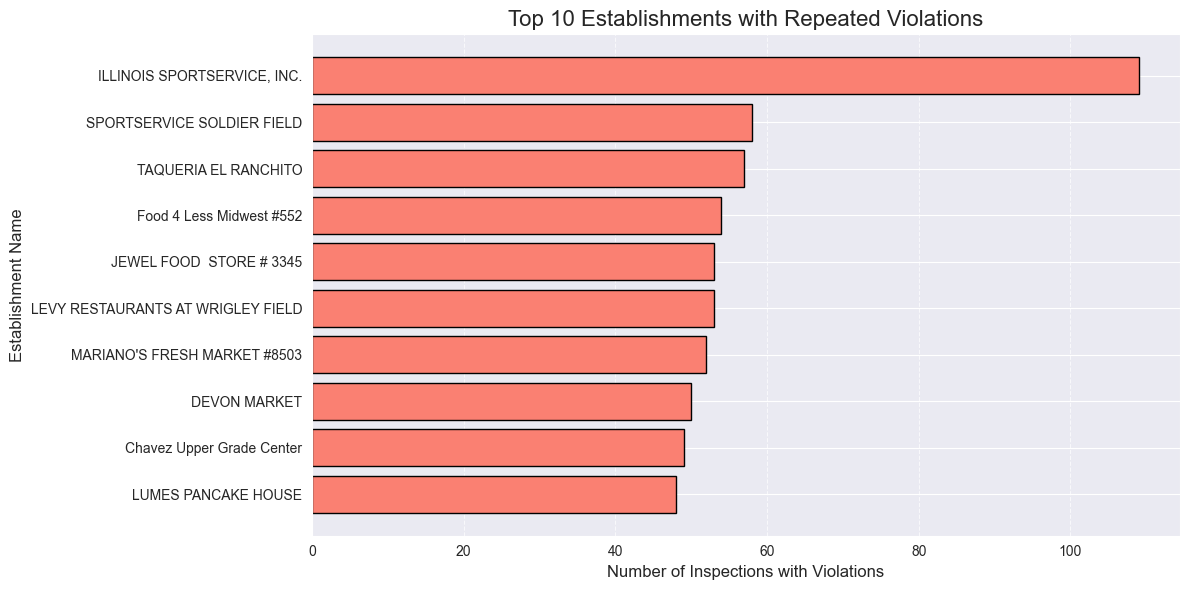

In [9]:
# Filter the necessary columns and remove rows with missing or invalid License #
location_violations = data[['License #', 'Violations']].dropna()
location_violations = location_violations[location_violations['License #'] != 0]  # Exclude invalid License #

# Count the number of inspections with violations for each unique license
violation_counts_per_id = location_violations.groupby('License #').size()

# Filter establishments with more than one inspection containing violations
repeated_violations = violation_counts_per_id[violation_counts_per_id > 1].reset_index()
repeated_violations.columns = ['License #', 'Violation Count']

# Sort by violation count in descending order
repeated_violations = repeated_violations.sort_values(by='Violation Count', ascending=False)

# Merge with the original dataset to get additional details
detailed_repeated_violations = repeated_violations.merge(
    data[['License #', 'DBA Name', 'Address']].drop_duplicates(subset=['License #']),
    on='License #',
    how='left'
)

# Display the top 10 detailed repeated violations
print(detailed_repeated_violations.head(10))

# Visualize the top 10 establishments
plt.figure(figsize=(12, 6))
plt.barh(detailed_repeated_violations['DBA Name'].head(10), detailed_repeated_violations['Violation Count'].head(10), color='salmon', edgecolor='black')
plt.title('Top 10 Establishments with Repeated Violations', fontsize=16)
plt.xlabel('Number of Inspections with Violations', fontsize=12)
plt.ylabel('Establishment Name', fontsize=12)
plt.gca().invert_yaxis()  # Reverse order to show the worst offenders on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Great. Now we know which stores we should not go into!

## Inspections for a Given Restaurant Name

Inspection history for 'ILLINOIS SPORTSERVICE':


,Inspection Date,Results,Violations,Risk,Inspection Type
281447,2010-03,Pass,NaN,Risk 3 (Low),Canvass
279899,2010-03,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",Risk 2 (Medium),Canvass
279771,2010-03,Pass,NaN,Risk 2 (Medium),Canvass
279738,2010-03,Pass,NaN,Risk 2 (Medium),Canvass
279714,2010-03,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,Risk 2 (Medium),Canvass
...,...,...,...,...,...
71285,2022-06,Pass w/ Conditions,8. HANDS CLEAN & PROPERLY WASHED - Comments: O...,Risk 1 (High),Canvass
58351,2023-05,Fail,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,Risk 1 (High),Canvass
54155,2023-06,Pass,49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...,Risk 1 (High),Canvass Re-Inspection
40116,2024-05,Pass,56. ADEQUATE VENTILATION & LIGHTING; DESIGNATE...,Risk 1 (High),Canvass Re-Inspection


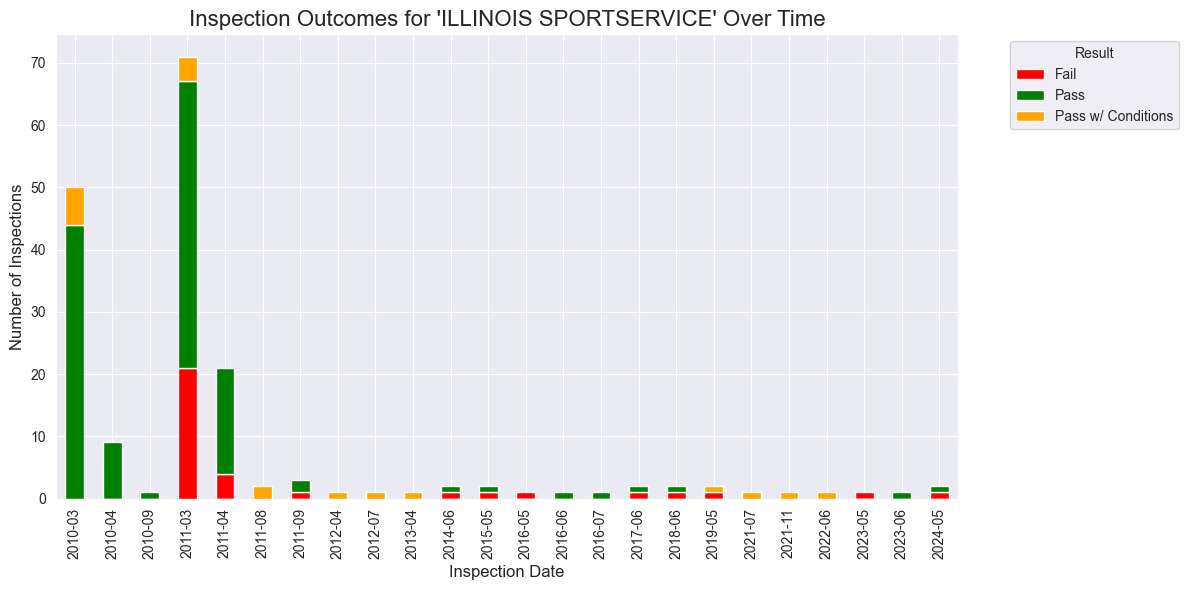

In [10]:
# Function to retrieve inspection history for a given restaurant name
def get_inspection_history(restaurant_name):
    # Filter data for the specific restaurant name
    restaurant_data = data[data['DBA Name'].str.contains(restaurant_name, case=False, na=False)].copy()
    
    if restaurant_data.empty:
        print(f"No inspections found for '{restaurant_name}'.")
        return
    
    # Format the Inspection Date (Year-Month only)
    restaurant_data['Inspection Date'] = pd.to_datetime(restaurant_data['Inspection Date']).dt.to_period('M')
    
    # Sort data by inspection date
    restaurant_data = restaurant_data.sort_values(by='Inspection Date')
    
    # Display relevant columns
    columns_to_display = ['Inspection Date', 'Results', 'Violations', 'Risk', 'Inspection Type']
    restaurant_inspection_history = restaurant_data[columns_to_display]
    print(f"Inspection history for '{restaurant_name}':")
    display(restaurant_inspection_history)
    
    # Group by date and results for visualization
    result_counts = restaurant_data.groupby(['Inspection Date', 'Results']).size().unstack(fill_value=0)
    
    # Custom colors for results
    result_colors = {
        'Pass': 'green',
        'Fail': 'red',
        'Pass w/ Conditions': 'orange',
        'Out of Business': 'gray'
    }
    
    # Plot the outcomes of inspections over time
    result_counts.plot(
        kind='bar', 
        stacked=True, 
        figsize=(12, 6), 
        color=[result_colors.get(result, 'blue') for result in result_counts.columns]  # Use custom colors
    )
    plt.title(f"Inspection Outcomes for '{restaurant_name}' Over Time", fontsize=16)
    plt.xlabel("Inspection Date", fontsize=12)
    plt.ylabel("Number of Inspections", fontsize=12)
    plt.xticks(rotation=90, fontsize=10)
    plt.legend(title='Result', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

get_inspection_history("ILLINOIS SPORTSERVICE")

Interestingly enough, it shows that even though Illinois Sportservice was the top place by the amount of repeated violations, it actually passed a lot 
of them. Albeit, with some conditions.

## Nearby Restaurants for a Given Address

In [11]:
def find_nearby_restaurants(address, radius_km=1):
    """
    Finds restaurants within a given radius (in km) from the provided address.
    """
    # Ensure latitude and longitude are present in the dataset
    if 'Latitude' not in data.columns or 'Longitude' not in data.columns:
        print("The dataset must include Latitude and Longitude columns.")
        return
    
    # Filter rows with missing latitude/longitude
    location_data = data[['DBA Name', 'Address', 'Latitude', 'Longitude', 'Results']].dropna(subset=['Latitude', 'Longitude'])
    
    # Geocode the given address to get latitude and longitude
    try:
        from geopy.geocoders import Nominatim
        geolocator = Nominatim(user_agent="restaurant_locator")
        location = geolocator.geocode(address)
        if not location:
            print(f"Could not geocode the address: {address}")
            return
        address_coords = (location.latitude, location.longitude)
    except Exception as e:
        print(f"Error geocoding the address: {e}")
        return
    
    # Calculate distances to all restaurants
    location_data['Distance (km)'] = location_data.apply(
        lambda row: geodesic(address_coords, (row['Latitude'], row['Longitude'])).km,
        axis=1
    )
    
    # Filter restaurants within the specified radius
    nearby_restaurants = location_data[location_data['Distance (km)'] <= radius_km].copy()
    nearby_restaurants = nearby_restaurants.sort_values(by='Distance (km)')
    
    if nearby_restaurants.empty:
        print(f"No restaurants found within {radius_km} km of '{address}'.")
        return
    
    # Display the nearby restaurants
    print(f"Restaurants within {radius_km} km of '{address}':")
    columns_to_display = ['DBA Name', 'Address', 'Distance (km)', 'Results']
    display(nearby_restaurants[columns_to_display])
    
# Example usage: Replace with the desired address and radius
find_nearby_restaurants("60606, Chicago, IL", radius_km=1)

Restaurants within 1 km of '60606, Chicago, IL':


,DBA Name,Address,Distance (km),Results
154082,RA @UBS CHICAGO.,1 N WACKER DR,0.053756,Pass
69611,KINSLEY BY FAIRGROUNDS,1 N WACKER DR,0.053756,Pass
171735,RA @UBS CHICAGO.,1 N WACKER DR,0.053756,Pass
36992,ONW Coffee shop,1 N WACKER DR,0.053756,Pass
111842,1 N WACKER KITCHEN AND BAR,1 N WACKER DR,0.053756,Pass w/ Conditions
...,...,...,...,...
104575,THE DINING ROOM AT KENDALL COLLEGE AT NATIONAL...,18 S MICHIGAN AVE,0.999404,Pass
66651,THE DINING ROOM AT KENDALL COLLEGE AT NATIONAL...,18 S MICHIGAN AVE,0.999404,Pass
256132,ACANTO,18 S MICHIGAN AVE,0.999404,Pass
4489,THE DAILY GRIND,18 S MICHIGAN AVE,0.999404,Pass


Looks like the function is working! With this, we can go into the last part of the project.

## Analyzing Potential Bias in Inspection Frequency

/var/folders/jr/yty_pyb1147d08bqw35fcl1c0000gn/T/ipykernel_66359/602319510.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=normalized_data['Zip'], y=normalized_data['Inspection Count'], palette='viridis')


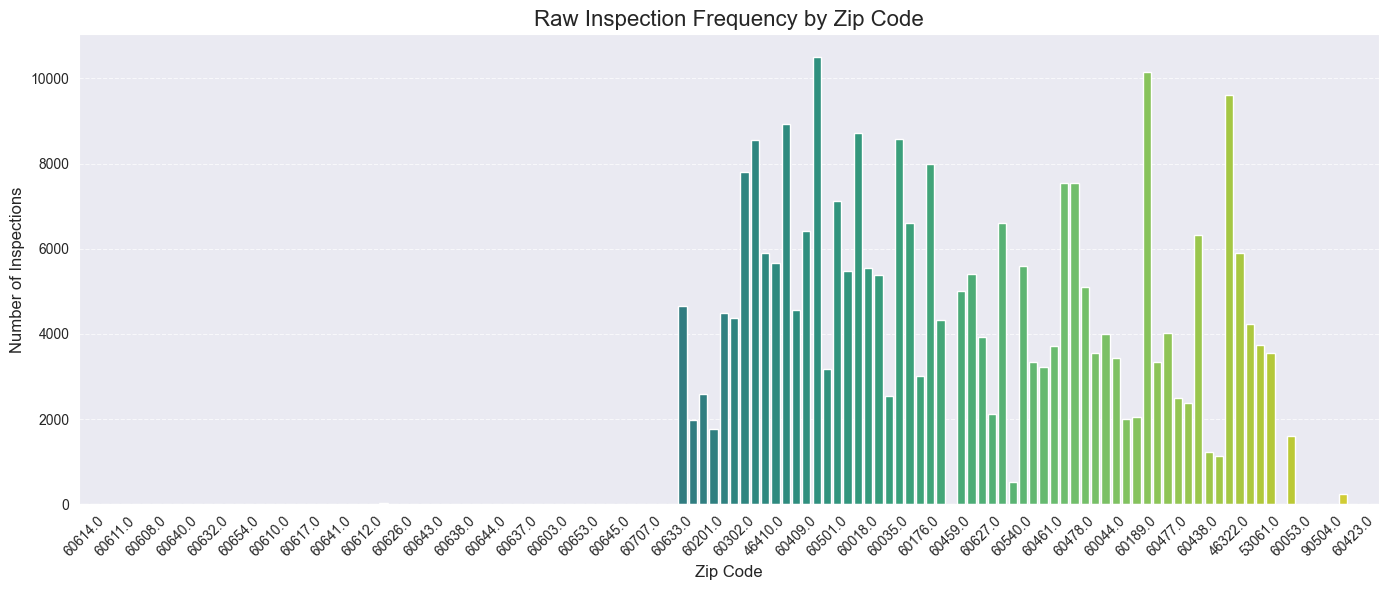

/var/folders/jr/yty_pyb1147d08bqw35fcl1c0000gn/T/ipykernel_66359/602319510.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=normalized_data['Zip'], y=normalized_data['Inspections per Establishment'], palette='magma')


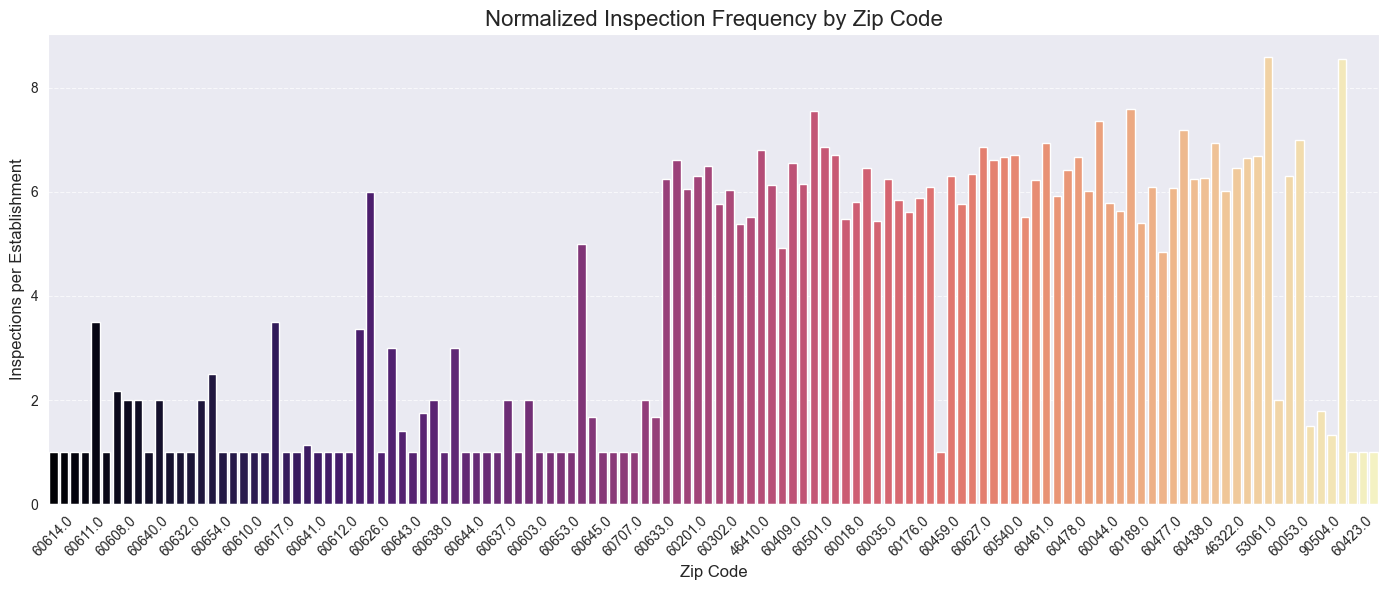

In [12]:
# Step 1: Count inspections per zip code
inspections_per_zip = data['Zip'].value_counts().reset_index()
inspections_per_zip.columns = ['Zip', 'Inspection Count']

# Step 2: Normalize by number of establishments per zip code (simulated or derived data)
establishments_per_zip = data.groupby('Zip')['License #'].nunique().reset_index()
establishments_per_zip.columns = ['Zip', 'Establishment Count']

# Merge inspection and establishment data
normalized_data = inspections_per_zip.merge(establishments_per_zip, on='Zip', how='left')

# Calculate normalized inspection rate
normalized_data['Inspections per Establishment'] = (
    normalized_data['Inspection Count'] / normalized_data['Establishment Count']
)

# Step 3: Visualize raw inspection counts by zip code
# Plot raw inspection counts by zip code with adjusted x-axis labels
plt.figure(figsize=(14, 6))
sns.barplot(x=normalized_data['Zip'], y=normalized_data['Inspection Count'], palette='viridis')
plt.title('Raw Inspection Frequency by Zip Code', fontsize=16)
plt.xlabel('Zip Code', fontsize=12)
plt.ylabel('Number of Inspections', fontsize=12)

# Adjust x-axis ticks: show every nth label
n = 3  
plt.xticks(ticks=range(0, len(normalized_data['Zip']), n), 
           labels=normalized_data['Zip'][::n], 
           rotation=45, fontsize=10)  

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot normalized inspection rates by zip code with adjusted x-axis labels
plt.figure(figsize=(14, 6))
sns.barplot(x=normalized_data['Zip'], y=normalized_data['Inspections per Establishment'], palette='magma')
plt.title('Normalized Inspection Frequency by Zip Code', fontsize=16)
plt.xlabel('Zip Code', fontsize=12)
plt.ylabel('Inspections per Establishment', fontsize=12)

# Adjust x-axis ticks: show every nth label
plt.xticks(ticks=range(0, len(normalized_data['Zip']), n), 
           labels=normalized_data['Zip'][::n], 
           rotation=45, fontsize=10) 

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

These graphs clearly show that there are two groups of zipcodes in terms of the number of inspections per establishemnt: one group has around one, and the second group has close to six!
This sure seems like a bias from the inspection side.

Yet again, there might be a lot of people who have very little idea about these zipcodes. This is why I would prefer to show
a map of Chicago:

Skipping field adjacent_zips: unsupported OGR type: 5
Skipping field adjacent_community_areas: unsupported OGR type: 5


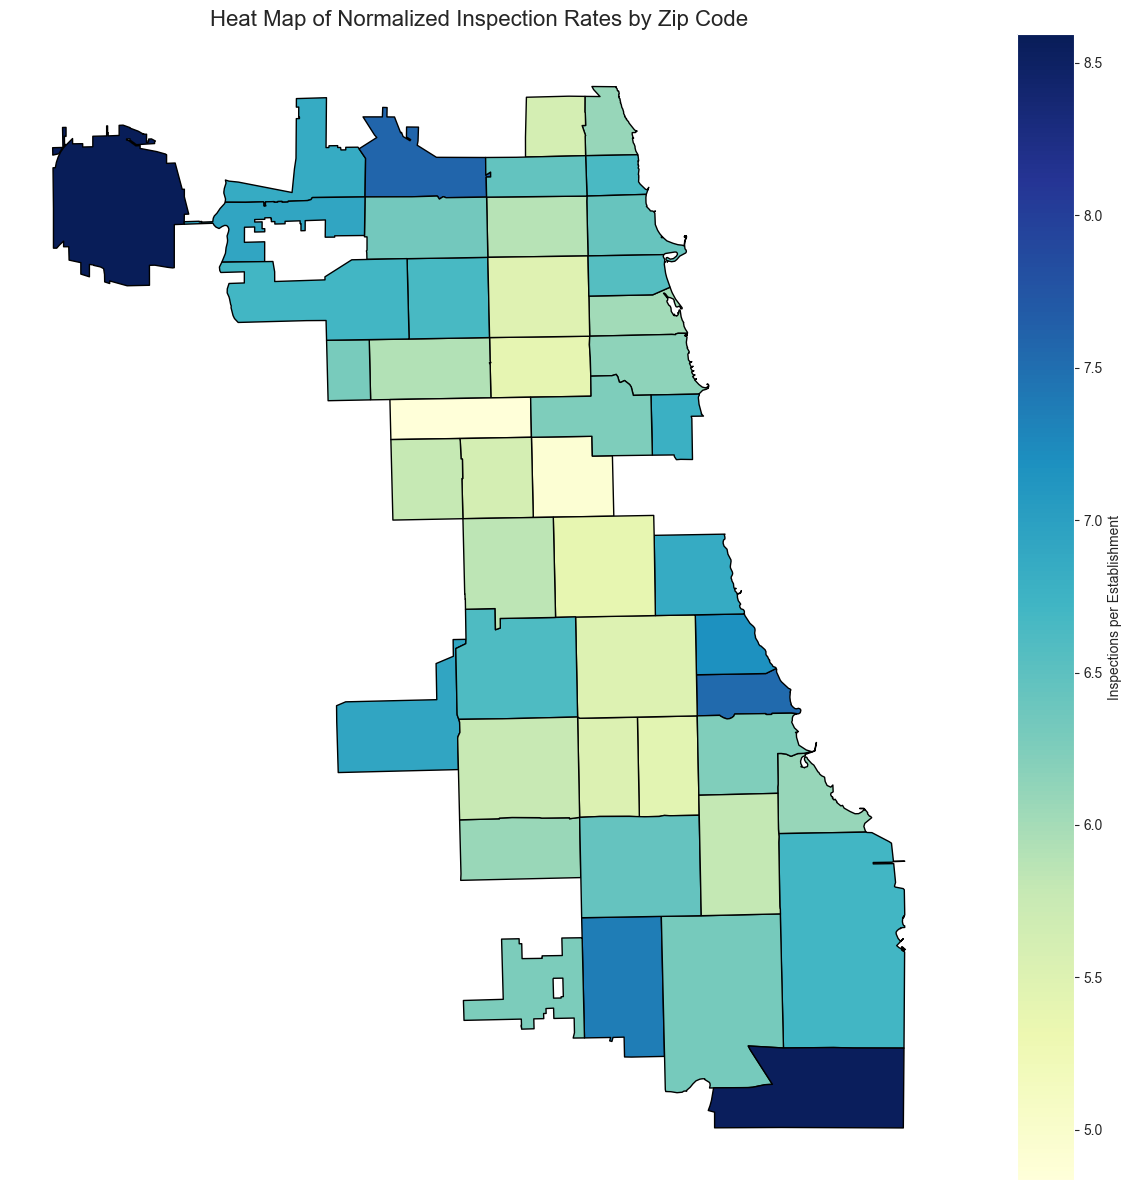

In [13]:
def plot_normalized_heat_map(normalized_data, geojson_file):
    """
    Plots a heat map of normalized inspection rates (inspections per establishment) by zip code on Chicago's map.
    """
    # Load GeoJSON file for Chicago zip code boundaries
    geo_data = gpd.read_file(geojson_file)

    # Ensure zip codes in GeoJSON and data match in type
    geo_data['ZIP'] = geo_data['ZIP'].astype(int)  # Convert ZIP column to int for merging

    # Merge normalized data with geographic boundaries
    merged_data = geo_data.merge(normalized_data, left_on='ZIP', right_on='Zip', how='left')

    # Plot the heat map
    fig, ax = plt.subplots(1, 1, figsize=(14, 12))
    merged_data.plot(
        column='Inspections per Establishment',  # Use normalized rates for the heat map
        cmap='YlGnBu',  # Heat map color scheme (green to blue)
        legend=True,
        legend_kwds={'label': "Inspections per Establishment", 'orientation': "vertical"},
        ax=ax,
        edgecolor='black'
    )

    # Add a title and clean up the map
    ax.set_title('Heat Map of Normalized Inspection Rates by Zip Code', fontsize=16)
    plt.axis('off')  # Turn off the axis for a clean map
    plt.tight_layout()
    plt.show()

plot_normalized_heat_map(normalized_data, 'zipcodes.geojson')

I believe the heatmap is more useful. The couple of notions we can make here is that O'Hare has many more inspections, which does make sense. 
I would imagine the shops at the airport to be a subject of more inspections. 

At the same time, the Southside definitely has a lot more inspections, than the Northside.

## Reflection

This project presented several challenges, primarily stemming from data quality issues and the complexity of geospatial analysis. Handling 
missing data in critical fields, such as `License #`, `Violations`, and `Latitude/Longitude`, required to drop or impute values, 
while inconsistencies in textual columns like Violations required extensive preprocessing to standardize the data. Geospatial analysis, 
including heatmap generation and geocoding, was particularly demanding, as it required alignment between the dataset and GeoJSON files and 
addressed occasional failures in address geocoding due to ambiguous input. Computational efficiency emerged as another significant challenge, 
particularly during tokenization and processing of large datasets. To mitigate these issues, optimized libraries and batch processing 
techniques were employed. 

Some modifications to the original proposal were necessary, such as using unique `License #` counts as a proxy for 
establishment numbers due to the lack of official data and refining visualizations with clearer labels and gridlines for better readability. 
Ultimately, this project reinforced the importance of robust data cleaning and preprocessing, the impact of well-designed visualizations in 
conveying complex patterns, and the value of adaptability in overcoming unforeseen obstacles. These lessons not only facilitated the 
successful completion of the analysis but also provided valuable insights for future data-driven projects.